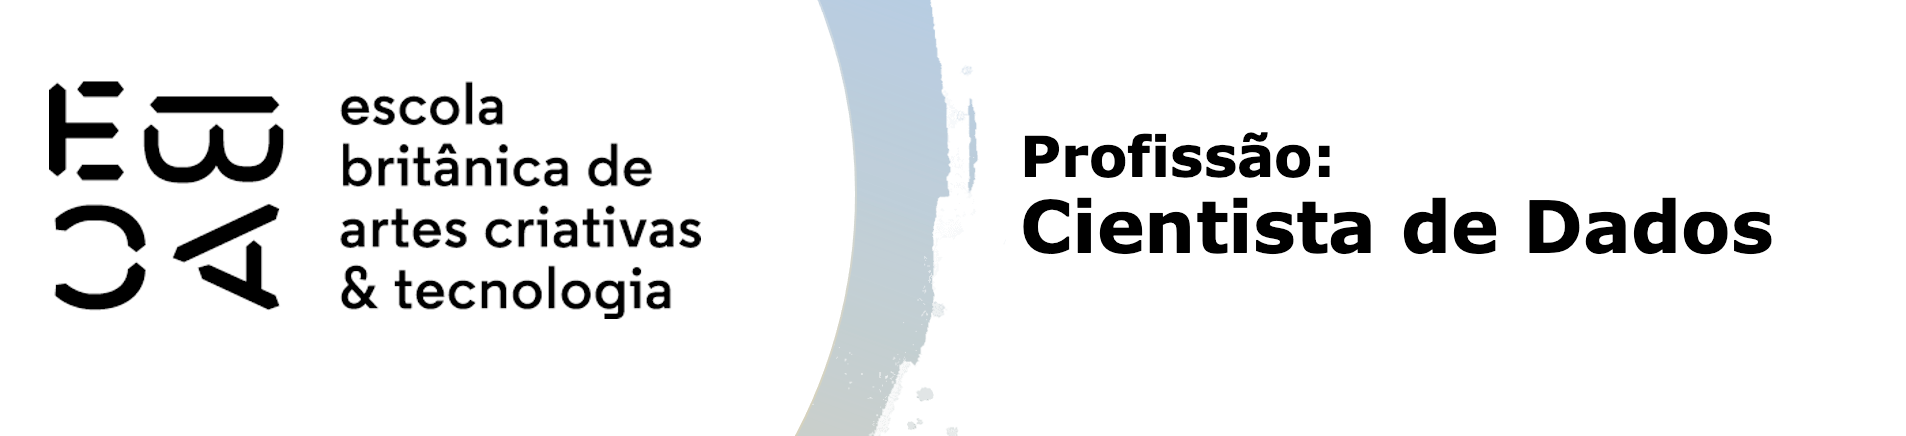

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
dtypes: category(1)

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

      Categoria  Proporção de Retorno
0     Alimentos              0.681584
1    Auto posto              0.250000
2    Construção              0.468810
3      Farmácia              0.351556
4       Mercado              0.478155
5  Restaurantes              0.746214
6        Varejo              0.138373
7     Vestuário              0.230729
8  não definido              0.363394


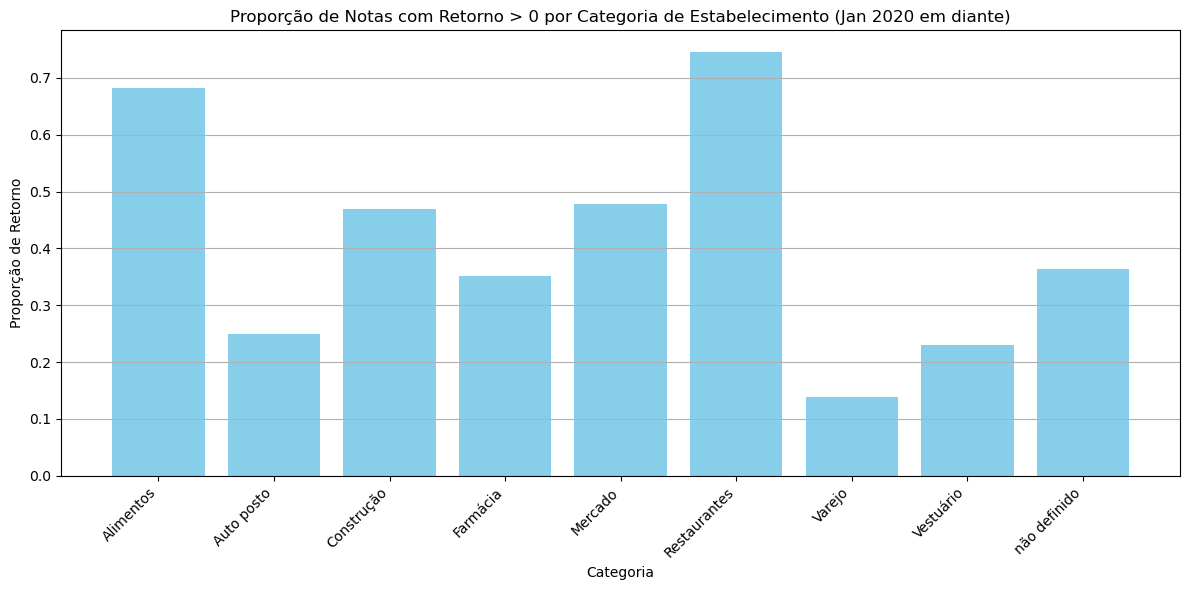

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar a base de dados
df = pd.read_pickle('base_nfp.pkl')

# Filtrar os dados de janeiro de 2020 em diante
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])
df_filtrado = df[df['Data Emissão'] >= '2020-01-01']

# Calcular a proporção de notas com retorno > 0 por categoria
proporcao_retorno = df_filtrado.groupby('categoria')['Retorno'].apply(lambda x: (x > 0).mean()).reset_index()
proporcao_retorno.columns = ['Categoria', 'Proporção de Retorno']

# Exibir tabela
print(proporcao_retorno)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(proporcao_retorno['Categoria'], proporcao_retorno['Proporção de Retorno'], color='skyblue')
plt.title('Proporção de Notas com Retorno > 0 por Categoria de Estabelecimento (Jan 2020 em diante)')
plt.xlabel('Categoria')
plt.ylabel('Proporção de Retorno')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

              Total Notas  Notas com Retorno > 0  Notas sem Retorno       WOE
categoria                                                                    
Alimentos            5050                   3442               1608  1.046342
Auto posto            540                    135                405 -0.813331
Construção          16047                   7523               8524  0.160360
Farmácia            10189                   3582               6607 -0.326928
Mercado             27558                  13177              14381  0.197846
Restaurantes         2179                   1626                553  1.363801
Varejo               5066                    701               4365 -1.543585
Vestuário            1920                    443               1477 -0.918918
não definido        18407                   6689              11718 -0.275381


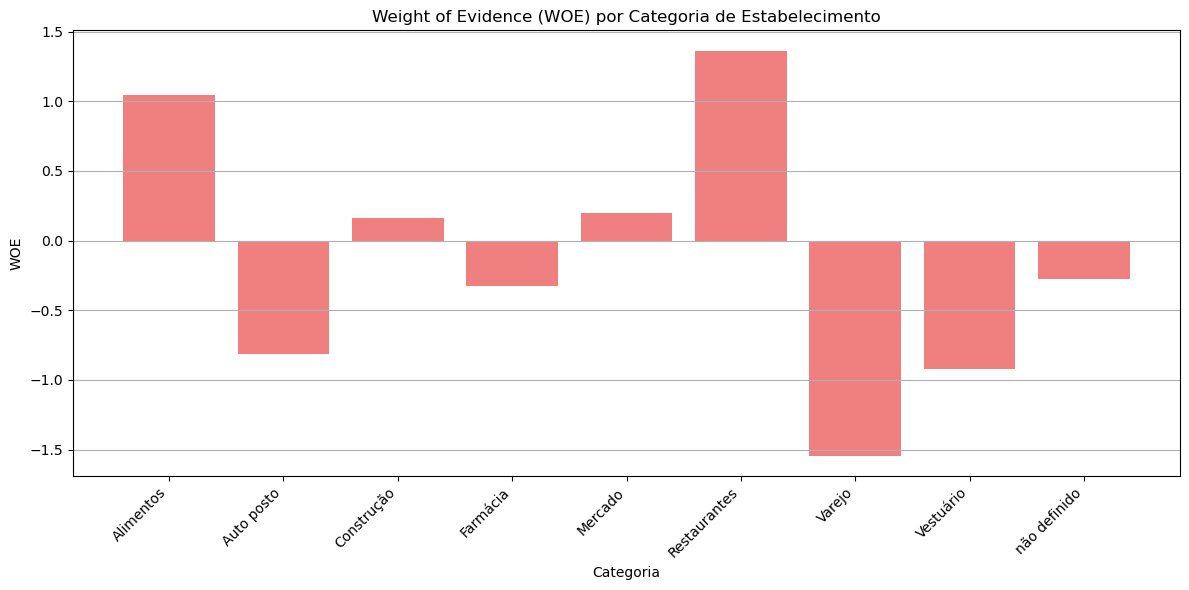

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar a base de dados
df = pd.read_pickle('base_nfp.pkl')

# Filtrar os dados de janeiro de 2020 em diante
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])
df_filtrado = df[df['Data Emissão'] >= '2020-01-01']

# Calcular total de notas e notas com retorno > 0 por categoria
total_notas = df_filtrado.groupby('categoria')['flag_credito'].count()
notas_com_retorno = df_filtrado[df_filtrado['Retorno'] > 0].groupby('categoria')['flag_credito'].count()

# Criar DataFrame para os cálculos
woe_df = pd.DataFrame({'Total Notas': total_notas, 'Notas com Retorno > 0': notas_com_retorno})
woe_df['Notas sem Retorno'] = woe_df['Total Notas'] - woe_df['Notas com Retorno > 0']

# Calcular proporções
woe_df['Proporção de Eventos'] = woe_df['Notas com Retorno > 0'] / woe_df['Notas com Retorno > 0'].sum()
woe_df['Proporção de Não Eventos'] = woe_df['Notas sem Retorno'] / woe_df['Notas sem Retorno'].sum()

# Calcular WOE
woe_df['WOE'] = np.log(woe_df['Proporção de Eventos'] / woe_df['Proporção de Não Eventos'])

# Exibir tabela
print(woe_df[['Total Notas', 'Notas com Retorno > 0', 'Notas sem Retorno', 'WOE']])

# Plotar gráfico de barras do WOE
plt.figure(figsize=(12, 6))
plt.bar(woe_df.index, woe_df['WOE'], color='lightcoral')
plt.title('Weight of Evidence (WOE) por Categoria de Estabelecimento')
plt.xlabel('Categoria')
plt.ylabel('WOE')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [15]:
import pandas as pd
import numpy as np

# Carregar a base de dados
df = pd.read_pickle('base_nfp.pkl')

# Filtrar os dados de janeiro de 2020 em diante
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])
df_filtrado = df[df['Data Emissão'] >= '2020-01-01']

# Calcular total de notas e notas com retorno > 0 por categoria
total_notas = df_filtrado.groupby('categoria')['flag_credito'].count()
notas_com_retorno = df_filtrado[df_filtrado['Retorno'] > 0].groupby('categoria')['flag_credito'].count()

# Criar DataFrame para os cálculos
woe_df = pd.DataFrame({'Total Notas': total_notas, 'Notas com Retorno > 0': notas_com_retorno})
woe_df['Notas sem Retorno'] = woe_df['Total Notas'] - woe_df['Notas com Retorno > 0']

# Calcular proporções
woe_df['Proporção de Eventos'] = woe_df['Notas com Retorno > 0'] / woe_df['Notas com Retorno > 0'].sum()
woe_df['Proporção de Não Eventos'] = woe_df['Notas sem Retorno'] / woe_df['Notas sem Retorno'].sum()

# Calcular WOE
woe_df['WOE'] = np.log(woe_df['Proporção de Eventos'] / woe_df['Proporção de Não Eventos'])

# Calcular IV
woe_df['IV'] = (woe_df['Proporção de Eventos'] - woe_df['Proporção de Não Eventos']) * woe_df['WOE']
IV_total = woe_df['IV'].sum()

# Exibir resultados
print("Information Value (IV):", IV_total)


Information Value (IV): 0.27882574285237305


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


## Conclusões sobre a Análise de Retorno e Information Value (IV)

A análise da proporção de retorno por categoria de estabelecimento revelou as seguintes conclusões:

1. **Categorias com Maior Proporção de Retorno**:
   - **Alimentos** (68,16%) e **Restaurantes** (74,62%) se destacam com as maiores proporções de retorno. Essas categorias podem ser consideradas mais propensas a gerar créditos, sugerindo que os consumidores que direcionam suas notas fiscais para a AMA tendem a utilizar esses estabelecimentos.

2. **Categorias com Menor Proporção de Retorno**:
   - **Varejo** (13,84%) apresentou a menor proporção de retorno. Essa categoria pode incluir produtos que não são incentivados pelo programa, como eletrônicos e vestuário, que geralmente têm menos crédito disponível.

3. **Análise do WOE**:
   - O WOE indica a força da relação entre as categorias e a probabilidade de ter retorno. Categorias como **Alimentos** e **Restaurantes** têm valores positivos de WOE, sugerindo que essas categorias são boas preditoras de retorno. Em contraste, categorias como **Varejo** têm WOE negativo, indicando uma menor propensão a retorno.

4. **Information Value (IV)**:
   - O IV total de **0,28** sugere que a variável "categoria" tem uma capacidade moderada de discriminar entre notas com retorno > 0 e notas sem retorno. Um IV entre 0,1 e 0,3 indica que a variável possui um valor preditivo útil, enquanto valores acima de 0,3 são considerados bons. Portanto, ainda há espaço para melhorar a modelagem preditiva usando essa variável.

